<a href="https://colab.research.google.com/github/Preeray/emotion-detection/blob/main/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
!pip install pandas numpy seaborn neattext scikit-learn joblib

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import neattext.functions as nfx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [98]:
df = pd.read_csv("/content/emotion_dataset.csv")
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


<Axes: >

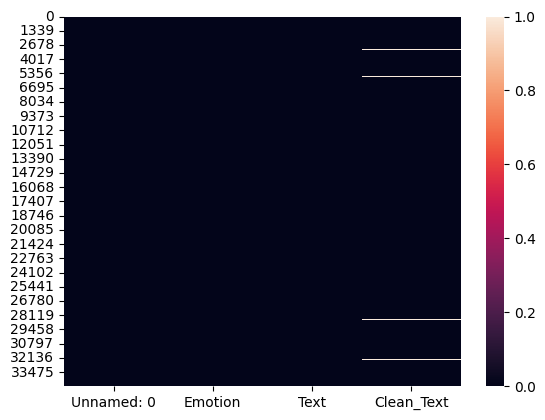

In [99]:
sns.heatmap(df.isnull())

In [100]:
df['Clean_text'] = df['Text'].apply(lambda x: nfx.remove_stopwords(nfx.remove_punctuations(str(x))))

In [101]:
X = df['Clean_text']
y = df['Emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [103]:
model = LogisticRegression(max_iter=2000)

model.fit(X_train_tfidf, y_train)
#from sklearn.ensemble import RandomForestClassifier
#model= RandomForestClassifier(max_features = 3, n_estimators = 100, bootstrap = True)
#model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=2000)

In [104]:
preds = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

Accuracy: 0.6148871964362695
              precision    recall  f1-score   support

       anger       0.64      0.54      0.59       836
     disgust       0.65      0.06      0.12       202
        fear       0.78      0.64      0.70      1104
         joy       0.57      0.84      0.68      2214
     neutral       0.70      0.32      0.44       481
     sadness       0.59      0.60      0.59      1327
       shame       0.70      0.30      0.42        23
    surprise       0.60      0.38      0.47       772

    accuracy                           0.61      6959
   macro avg       0.65      0.46      0.50      6959
weighted avg       0.63      0.61      0.60      6959



In [105]:
joblib.dump(model, "emotion_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [106]:
def predict_emotion(text):
  model = joblib.load("emotion_model.pkl")
  tfidf = joblib.load("tfidf_vectorizer.pkl")
  cleaned = nfx.remove_stopwords(nfx.remove_punctuations(str(text)))
  vector = tfidf.transform([cleaned])
  return model.predict(vector)[0]

In [107]:
while True:
    user_input = input("Enter text (or 'exit'): ")
    if user_input.lower() == 'exit':
        break
    emotion = predict_emotion(user_input)
    print("Predicted Emotion:", emotion)

Enter text (or 'exit'): i am happy
Predicted Emotion: joy
Enter text (or 'exit'): exit
